# 3. Classification

The most common supervised learning tasks are **regression** and **classification**. We already worked through a ML project involving regression (housing prices), so it's time to give classification some of the attention it deserves.  

#### MNIST

In this Chapter, we will use the classic MNIST dataset, probably the most common dataset for image classification. 

Indeed, we can download MNIST directly from scikit-learn:  

In [1]:
import os
import numpy as np
import sklearn

In [2]:
# working on the 8x8 digits dataset (instead of MNIST)
from sklearn.datasets import load_digits

digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [17]:
X, y = digits["data"], digits["target"]

In [19]:
X.shape

(1797, 64)

In [20]:
y.shape

(1797,)

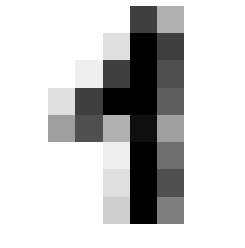

In [10]:
# visualizing a digit

import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[42]
some_digit_image = some_digit.reshape(8, 8)
plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [11]:
y[42]

1

In [15]:
# y as integers
y = y.astype(np.uint8)

In [26]:
# keeping the 6/7 : 1/7 ratio as in the book
X_train, X_test, y_train, y_test = X[:1542], X[1542:], y[:1542], y[1542:]

#### Binary classifier

A binary classifier will be able to distinguish between two classes: "X" and "not-X". For example:

In [48]:
y_train_1 = (y_train == 1) # True for 1, False otherwise
y_test_1 = (y_test == 1)

Let's start with with a Stochastic Gradient Descent (SGD) classifier:

In [49]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42) # ensure consistency across different runs
sgd_clf.fit(X_train, y_train_1)

C:\Users\Giuseppe\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [50]:
sgd_clf.predict([some_digit]) # some_digit = 1

array([ True])

Wrong! Let's check accuracy.

In [71]:
# implementation

from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)
for train_index, test_index in skfolds.split(X_train, y_train_1):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_1[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_1[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.9221789883268483
0.9163424124513618
0.9688715953307393


C:\Users\Giuseppe\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\Giuseppe\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\Giuseppe\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and t

In [72]:
# more simply

from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_1, cv=3, scoring="accuracy")

C:\Users\Giuseppe\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\Giuseppe\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\Giuseppe\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and t

array([0.92217899, 0.91634241, 0.9688716 ])

Well, one thing to remember is that an hypothetical *always not-1* classifier would get 90% accuracy here. Easy win, but useless.

Let's use a **confusion matrix** instead:

In [54]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_1, cv=3)

C:\Users\Giuseppe\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\Giuseppe\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\Giuseppe\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and t

In [55]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_1, y_train_pred)

array([[1353,   33],
       [  66,   90]], dtype=int64)

Rows = actual class
Cols = predicted class

Negatives | Positives 
------------ | ------------- 
False negatives | True positives 
True negatives | False positives

For a more concise metric, we may use something like **precision** (accuracy of positive predictions)

$Precision = \frac{TP}{\text{TP + FP}}$ 

Or **recall** (ratio of positive instances that are correctly detected by the classifier)

$Recall = \frac{TP}{\text{TP + FN}}$ 

In [58]:
# using Scikit-learn

from sklearn.metrics import precision_score, recall_score

precision_score(y_train_1, y_train_pred)

0.7317073170731707

In [73]:
recall_score(y_train_1, y_train_pred) # pretty low recall :/

0.5769230769230769

Our classifier only detected 57.7% of the 1s. Quite poor. 

We can further combine precision and recall into a single metric called the $F_1 score$:

$F_1 score = \frac{2}{\frac{1}{precision} + \frac{1}{recall}} = \text{2 x} \frac{\text{precision x recall}}{\text{precision + recall}} = \frac{TP}{TP + \frac{FN + FP}{2}}$ 

Note: as many things in life, you can't have it all: increasing precision reduces recall, and vice versa (precision / recall tradeoff). 

This tradeoff is a result of our threshold. We cannot set it directly, but we can see the decision scores:

In [74]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_1, cv = 3, method = "decision_function")

C:\Users\Giuseppe\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\Giuseppe\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\Giuseppe\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and t

In [75]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_1, y_scores)

We can also plot precision and recall as functions of the threshold value using Matplotlib:

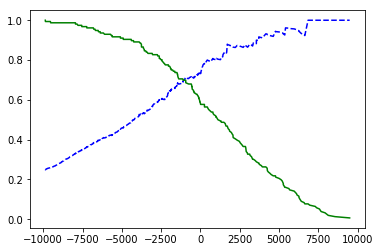

In [63]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
# highlight the threshold, add the legend, axis label and grid
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

Let's assume we want to go for 90% precision. We can find this by using `np.argmax()`:

In [64]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

In [65]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

Checking precision and recall again:

In [76]:
precision_score(y_train_1, y_train_pred_90)

0.9

In [77]:
recall_score(y_train_1, y_train_pred_90)

0.28846153846153844

#### The ROC curve

The _receiver operating characteristic_ (**ROC**) curve is another common tool used with binary classifiers. It plots true positive rate (another name
for recall) against the false positive rate (ratio of negative instances that are incorrectly classified as positive). 

FPR = 1 - TNR (also called _specificity_) 

ROC therefore plots **recall** vs **1 - specificity**

In [68]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_1, y_scores)

Then we can plot the FPR against the TPR using Matplotlib:

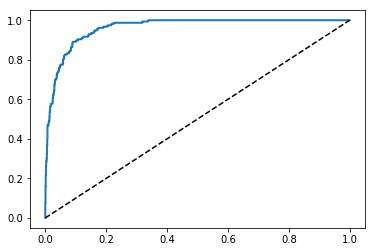

In [69]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    
plot_roc_curve(fpr, tpr)
plt.show()

A good way to compare classifiers in the area under the curve (AUC). Perfect classifier has area = 1, purely random = 0.5.

In [78]:
from sklearn.metrics import roc_auc_score

roc_auc_score =(y_train_1, y_scores)

**Note**: 